In [1]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## 선형회귀분석의 기초

회귀분석이란 독립변수 $x$를 입력으로 갖는 어떤 함수의 출력값이 실제 $y$값과 가능한 한 비슷하게 만드는 그 함수를 찾는 과정이다.

$$\hat{y} = f(x) \sim y$$

함수의 종류는 무수히 많기 때문에 함수의 종류는 **선형함수**로 국한한다.

> 선형함수란 y절편이 있고 x의 선형조합으로 이루어지는 함수이다.

$$\hat{y} = w_0(y절편) + w_1x_1 + w_2x_2 + ... + w_Dx_D = w_0 + w^Tx$$

이런 선형함수만 사용하는 회귀분석을 **선형회귀모형(linear regression model)**이라한다.

위 식에서 가중치 벡터 $w$는 함수 $f(x)$의 계수(coefficient)이자 선형회귀 모형의 **모수(parameter)**이다.

## 상수항 결합(bias augmentation)

$$\hat{y} = w_0(y절편) + w_1x_1 + w_2x_2 + ... + w_Dx_D = w_0 + w^Tx$$

위 식을 간단하게 만들기 위한 목적으로 상수항을 독립변수 데이터에 추가할 수 있다.

\begin{split}
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\end{split}

이렇게 상수항이 추가되면 앞의 식이 내적으로 간단하게 표시된다.

\begin{split} f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a = w_a^T x_a
\end{split}

In [14]:
# statsmodels 패키지의 상수항 결합

X0 = np.arange(10).reshape(5, 2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [16]:
# 상수항 결합
# add_constant

import statsmodels.api as sm

X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

## 최소자승법(OLS)

즉, 잔차제곱합이 영벡터에 최대한 가까워지는 가중치 벡터 $w$를 구하는 문제가 된다.

RSS(잔차제곱합)을 가장 작게 만드는 가중치 벡터 $w$를 위의 내용을 이용해 정리하면 다음과 같이 표현할 수 있다.

$$RSS = e^Te$$
$$= (y - Xw)^T(y - Xw)$$
$$= y^Ty - 2y^TXw+w^TX^TXw$$

이렇게 정리한 식을 이용해 RSS를 최소로 만드는 가중치 벡터를 구하기 위한 방법으로 최적화를 이용할 수 있다.

즉, 위 식을 $w$로 미분하여 잔차 제곱합의 그래디언트 벡터가 0이 되면 된다.

$$\dfrac{dRSS}{dw} = -2X^Ty + wX^TXw$$

그래디언트 벡터가 0이 되어야 하기 때문에 다음의 식이 성립한다.

$$X^TXw^* =  X^Ty$$

여기서 정방행렬인 $X^TX$의 역행렬이 존재한다면 가중치 벡터 $w^*$를 다음의 식으로 구할 수 있게된다.

> $$w^* = (X^TX)^{-1}X^Ty$$

위 식에서 $y$의 앞부분을 의사역행렬(pseudo inverse)라 하며 $A^+$로도 표기할 수 있다.

In [37]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

In [38]:
# 가중치 벡터 계산

w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

12228.046261044003

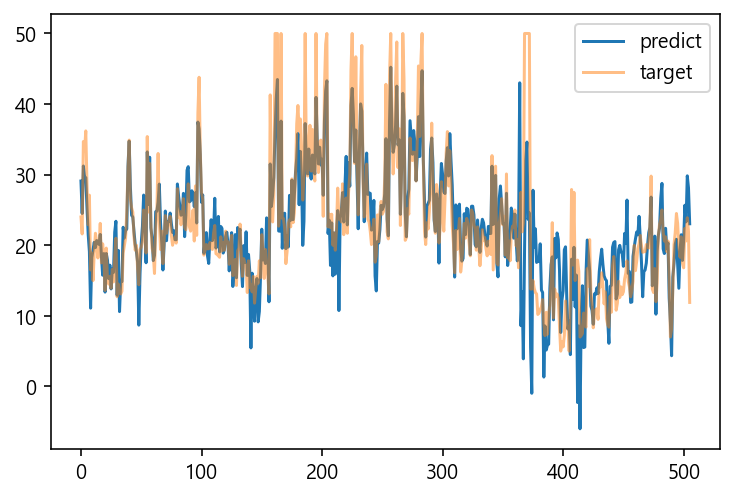

In [40]:
plt.plot(X @ w, label='predict')
plt.plot(y, label='target', alpha=0.5)
plt.legend()

# 잔차제곱합
np.linalg.norm(X@w - y) ** 2

In [41]:
# lstsq() 메소드를 이용한 가중치 벡터 계산

w, resid, rank, s = np.linalg.lstsq(X, y)
w

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

## 넘파이를 이용한 선형회귀분석

`make_regrssion()` 메소드를 이용해 bias가 100, noise가 10인 독립변수가 하나인 샘플 200개를 생성한다.

In [62]:
from sklearn.datasets import make_regression

bias = 100

X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)

X = sm.add_constant(X0)
y = y.reshape(-1,1)

In [63]:
# make_regression을 통해 나온 가중치

w

array(86.44794301)

In [65]:
# OLS 식을 이용해 직접구한 bias와 weight

np.linalg.inv(X.T @ X) @ X.T @ y

array([[99.79150869],
       [86.96171201]])

In [67]:
# lstsq()로 구한 bias, weight

w, resid, rank, s = np.linalg.lstsq(X, y)
w

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([[99.79150869],
       [86.96171201]])

최소자승법으로 구한 선형회귀 모형

$$y = 100 + 86.96171201x + \epsilon$$

$$\hat{y} = 99.79150869(bias) + 86.96171201(weight)x$$

**noise(잡음)이 존재하기 때문에 실제 식과 완벽하게 똑같은 선형회귀식을 구할 수 없지만 근삿값을 구할 수 있다.**

새로운 $X$값 10개를 생성해 선형회귀식에 대입한 결과 예측값은 다음과 같다.

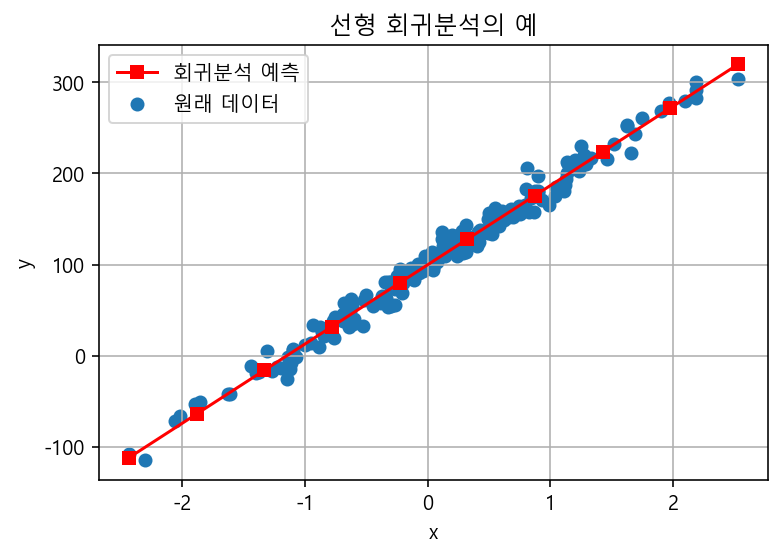

In [71]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = X_new @ w

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.grid()
plt.show()

## sklearn 패키지를 이용한 선형회귀분석

In [72]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X0, y)
print(lr.intercept_, lr.coef_)

[99.79150869] [[86.96171201]]


In [75]:
predict = lr.predict([[-2], [-1], [0], [1], [2]])
predict

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

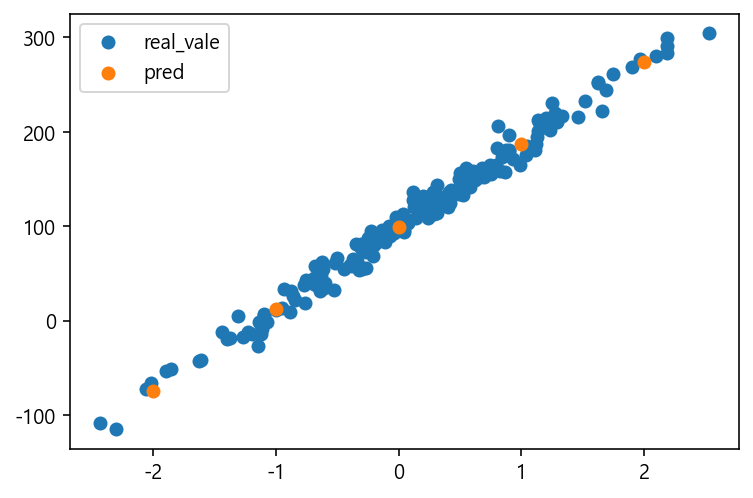

In [82]:
plt.scatter(X0, y, label='real_vale')
plt.scatter([[-2], [-1], [0], [1], [2]], predict, label='pred')
plt.legend()
plt.show()

## statsmodels 패키지를 이용한 선형회귀분석

statsmodels 패키지는 OLS 클래스를 사용해 선형회귀분석을 실시

1. 독립변수와 종속변수가 모두 포함된 DF생성, 상수항 결합은 생략.
2. OLS클래스 객체 생성. from_formula 메소드의 인수로 종속변수와 독립변수를 지정하는 formula 문자열 입력, data인수로는 독립변수와 종속변수가 모두 포함된 DF를 입력

`model = OLS.from_formula(formula, data=df)`

또는 독립변수만 존재하는 `dfx`, 종속변수만 존재하는 `dfy`를 인수로 넘길 수 있다.

다만 이 때는 `dfx`가 상수항을 가지고 있어야한다.

`model = OLS(dfy, dfx)`

3. fit 메소드로 모형을 추정하고 별도의 RegressionResults 클래스 객체가 반환된다.

`result = model.fit()`

4. `RegressionResults` 클래스 객체는 `summary` 메소드와 예측을 위한 `predictio` 메소드를 제공

`print(result.summary())`

`y_new = result.predict(x_new)`

**예측을 위한 데이터는 추정시와 동일하게 상수항 결합을 해주어야 한다.**

In [86]:
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [88]:
dfy = df[['y']]
dfX = sm.add_constant(df[['x']]) # 상수항결합

model = sm.OLS(dfy, dfX)
result = model.fit()

또는 formula 문자열을 이용해 아래와 같이 model을 생성할 수 있다.

formula 문자열을 만드는 방법은 ~ 기호의 왼쪽에 종속변수 이름, ~ 기호의 오른쪽에 독립변수 이름을 넣는다.

독립변수가 여러개인 경우 pastsy 패키지의 formula 문자열을 만드는 방법을 따른다.

In [95]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

In [96]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          8.17e-182
Time:                        13:43:51   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

위 보고서 결과에서 `coef`에 집중하자.

coef의 결과로 가중치값이 반환되는 것을 확인할 수 있다.

In [97]:
result.predict({"x": [-2, -1, 0, 1, 2] })

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

In [98]:
# 가중치 벡터 

result.params

Intercept    99.791509
x            86.961712
dtype: float64

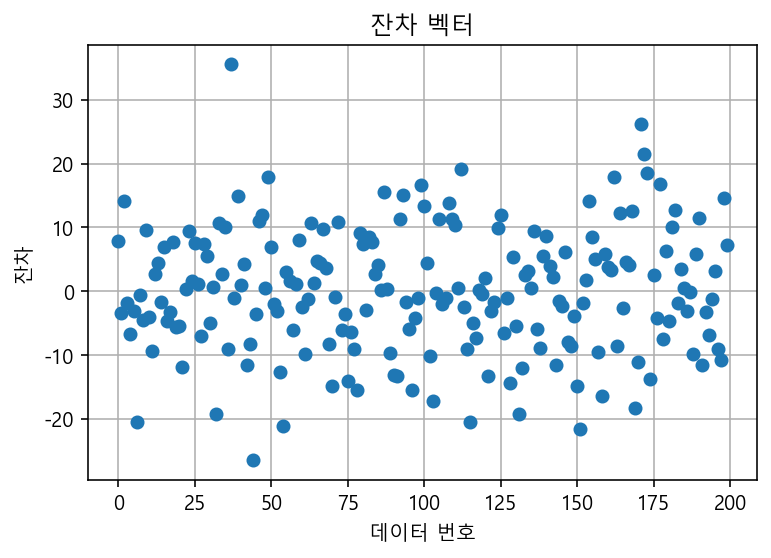

In [100]:
# 잔차벡터의 형태

result.resid.plot(style="o")
plt.title("잔차 벡터")
plt.xlabel("데이터 번호")
plt.ylabel("잔차")
plt.grid()
plt.show()

직교방정식에서 나온 두가지 성질이 성립하는지 확인

1. 잔차의 합을 구하면 0

In [101]:
result.resid.sum()

6.064482249712455e-12

2. $x$의 평균값을 넣으면 $y$의 평균값과 같은 값이 나온다.

In [103]:
result.predict({"x":X0.mean()})

0    109.069351
dtype: float64

In [104]:
y.mean()

109.06935068170773

## 보스턴 집값 예측(statsmodels)

In [108]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
print(result_boston.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        13:48:11   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

도출된 보스턴 집값 예측 회귀식

In [112]:
result_boston.params

const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64

\begin{split}
\begin{aligned}
y &= 36.4595 - 0.1080\,\text{CRIM} + 0.0464\,\text{ZN}  + 0.0206\,\text{INDUS}  + 2.6867 \,\text{CHAS} \\
&  -17.7666\,\text{NOX}  + 3.8099\,\text{RM}  + 0.0007\,\text{AGE}  -1.4756\,\text{DIS} + 0.3060\,\text{RAD} \\
&  -0.0123\,\text{TAX}  -0.9527\,\text{PTRATIO}  + 0.0093 \,\text{B} -0.5248\,\text{LSTAT}
\end{aligned}
\end{split}